In [1]:
import numpy as np
import matplotlib.pyplot as plt

import pyod

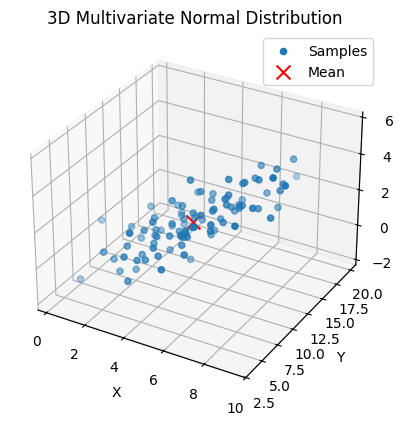

In [2]:
data = np.random.multivariate_normal(
    mean=[5, 10, 2],
    cov=[[3, 2, 2], [2, 10, 1], [2, 1, 2]],
    size=100  # Increased for better visualization
)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(data[:, 0], data[:, 1], data[:, 2], label='Samples')

ax.scatter(5, 10, 2, color='red', s=100, marker='x', label='Mean')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Multivariate Normal Distribution')
ax.legend()

plt.show()

In [9]:
# Step 1: Standardize the data
mean = np.mean(data, axis=0)
std_dev = np.std(data, axis=0)
data_std = (data - mean) / std_dev

# Step 2: Compute the covariance matrix
cov_matrix = np.cov(data_std.T)

# Step 3: Calculate eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Step 4: Sort eigenvalues and eigenvectors
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues_sorted = eigenvalues[sorted_indices]
eigenvectors_sorted = eigenvectors[:, sorted_indices]

# Step 5: Project data onto principal components
n_components = 2
principal_components = eigenvectors_sorted[:, :n_components]
projected_data = np.dot(data_std, principal_components)

# print("Projected Data:\n", projected_data)

n_components = 2
principal_components = eigenvectors_sorted[:, :n_components]
projected_data = np.dot(data_std, principal_components)


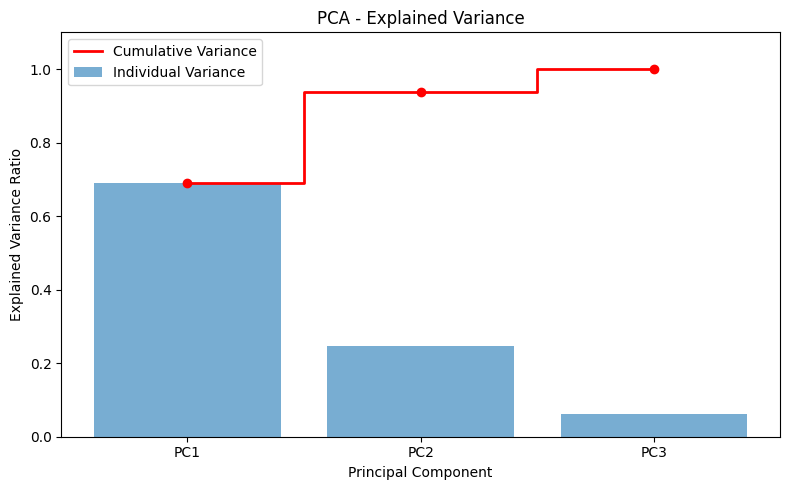

Individual variance: [0.69136771 0.24715262 0.06147967]
Cumulative variance: [0.69136771 0.93852033 1.        ]


In [11]:
# Calculate explained variance ratio
explained_variance = eigenvalues_sorted / np.sum(eigenvalues_sorted)
cumulative_variance = np.cumsum(explained_variance)

# Create the plot
fig, ax = plt.subplots(figsize=(8, 5))

# Bar plot for individual variances
x = np.arange(1, len(explained_variance) + 1)
ax.bar(x, explained_variance, alpha=0.6, label='Individual Variance')

# Step plot for cumulative variance
ax.step(x, cumulative_variance, where='mid', color='red', linewidth=2, label='Cumulative Variance')

# Add markers on step plot
ax.scatter(x, cumulative_variance, color='red', zorder=3)

ax.set_xlabel('Principal Component')
ax.set_ylabel('Explained Variance Ratio')
ax.set_title('PCA - Explained Variance')
ax.set_xticks(x)
ax.set_xticklabels([f'PC{i}' for i in x])
ax.legend()
ax.set_ylim(0, 1.1)

plt.tight_layout()
plt.show()

# Print values
print("Individual variance:", explained_variance)
print("Cumulative variance:", cumulative_variance)